In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Employee_data.csv")
data

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74605,13450,44,Female,20,Healthcare,7578,Fair,Medium,Low,2,...,3,Mid,Large,52.0,No,No,No,Fair,Very High,Left
74606,2386,45,Male,26,Technology,8342,Excellent,Very High,Below Average,3,...,4,Mid,Medium,NaN,Yes,No,No,Poor,High,Stayed
74607,36968,28,Female,3,Technology,9763,Poor,Low,Average,0,...,3,Senior,Small,67.0,No,No,No,Poor,Medium,Left
74608,24276,37,Male,3,Education,3644,Fair,High,Average,2,...,4,Entry,Medium,16.0,No,No,No,Excellent,Medium,Stayed


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

# Data Cleansing


In [4]:
data.isnull().sum() 

Employee ID                      0
Age                              0
Gender                           0
Years at Company                 0
Job Role                         0
Monthly Income                   0
Work-Life Balance                0
Job Satisfaction                 0
Performance Rating               0
Number of Promotions             0
Overtime                         0
Distance from Home            1912
Education Level                  0
Marital Status                   0
Number of Dependents             0
Job Level                        0
Company Size                     0
Company Tenure (In Months)    2413
Remote Work                      0
Leadership Opportunities         0
Innovation Opportunities         0
Company Reputation               0
Employee Recognition             0
Attrition                        0
dtype: int64

In [5]:
#clean the null values 
data['Distance from Home'].fillna(data['Distance from Home'].median(), inplace=True)
data['Company Tenure (In Months)'].fillna(data['Company Tenure (In Months)'].median(), inplace=True)



In [6]:
#test the data again
data.isnull().sum() 

Employee ID                   0
Age                           0
Gender                        0
Years at Company              0
Job Role                      0
Monthly Income                0
Work-Life Balance             0
Job Satisfaction              0
Performance Rating            0
Number of Promotions          0
Overtime                      0
Distance from Home            0
Education Level               0
Marital Status                0
Number of Dependents          0
Job Level                     0
Company Size                  0
Company Tenure (In Months)    0
Remote Work                   0
Leadership Opportunities      0
Innovation Opportunities      0
Company Reputation            0
Employee Recognition          0
Attrition                     0
dtype: int64

In [7]:
# Identify and handle redundant values within categorical column
# Step 1: Select categorical columns
cat_cols = data.select_dtypes(include='object').columns

# Step 2: Preview unique values before cleaning
for col in cat_cols:
    print(f"Before cleaning - {col}:\n", data[col].unique())


Before cleaning - Gender:
 ['Male' 'Female']
Before cleaning - Job Role:
 ['Education' 'Media' 'Healthcare' 'Technology' 'Finance']
Before cleaning - Work-Life Balance:
 ['Excellent' 'Poor' 'Good' 'Fair']
Before cleaning - Job Satisfaction:
 ['Medium' 'High' 'Very High' 'Low']
Before cleaning - Performance Rating:
 ['Average' 'Low' 'High' 'Below Average']
Before cleaning - Overtime:
 ['No' 'Yes']
Before cleaning - Education Level:
 ['Associate Degree' 'Masterâ€™s Degree' 'Bachelorâ€™s Degree'
 'High School' 'PhD']
Before cleaning - Marital Status:
 ['Married' 'Divorced' 'Single']
Before cleaning - Job Level:
 ['Mid' 'Senior' 'Entry']
Before cleaning - Company Size:
 ['Medium' 'Small' 'Large']
Before cleaning - Remote Work:
 ['No' 'Yes']
Before cleaning - Leadership Opportunities:
 ['No' 'Yes']
Before cleaning - Innovation Opportunities:
 ['No' 'Yes']
Before cleaning - Company Reputation:
 ['Excellent' 'Fair' 'Poor' 'Good']
Before cleaning - Employee Recognition:
 ['Medium' 'Low' 'High'

In [8]:
# we get the education as the flaws is there then to change it

import unidecode

# Step 1: Identify all object-type columns
cat_cols = data.select_dtypes(include='object').columns

# Step 2: Define a cleaning function
def clean_text(val):
    if isinstance(val, str):
        val = val.strip()  # Trim spaces
        val = unidecode.unidecode(val)  # Fix encoding artifacts
        val = val.replace("â€™", "'").replace("â€“", "-")  # Extra fixes
        return val.title()  # Standard capitalization
    return val

# Step 3: Apply cleaning function
for col in cat_cols:
    data[col] = data[col].apply(clean_text)

# Optional: Check cleaned values
for col in cat_cols:
    print(f"{col}:\n", data[col].value_counts(dropna=False), "\n")


Gender:
 Male      40898
Female    33712
Name: Gender, dtype: int64 

Job Role:
 Technology    19350
Healthcare    17107
Education     15679
Media         12011
Finance       10463
Name: Job Role, dtype: int64 

Work-Life Balance:
 Good         28196
Fair         22569
Excellent    13451
Poor         10394
Name: Work-Life Balance, dtype: int64 

Job Satisfaction:
 High         37306
Very High    15101
Medium       14738
Low           7465
Name: Job Satisfaction, dtype: int64 

Performance Rating:
 Average          44786
High             14938
Below Average    11150
Low               3736
Name: Performance Rating, dtype: int64 

Overtime:
 No     50230
Yes    24380
Name: Overtime, dtype: int64 

Education Level:
 Bacheloraeur(Tm)S Degree    22365
Associate Degree            18678
Masteraeur(Tm)S Degree      15044
High School                 14701
Phd                          3822
Name: Education Level, dtype: int64 

Marital Status:
 Married     37470
Single      26039
Divorced    11101

In [9]:
data['Education Level'] = data['Education Level'].replace({
    'Bacheloraeur(Tm)S Degree': "Bachelor's Degree",
    'Masteraeur(Tm)S Degree': "Master's Degree"
})


In [10]:
for col in cat_cols:
    print(f"Before cleaning - {col}:\n", data[col].unique())


Before cleaning - Gender:
 ['Male' 'Female']
Before cleaning - Job Role:
 ['Education' 'Media' 'Healthcare' 'Technology' 'Finance']
Before cleaning - Work-Life Balance:
 ['Excellent' 'Poor' 'Good' 'Fair']
Before cleaning - Job Satisfaction:
 ['Medium' 'High' 'Very High' 'Low']
Before cleaning - Performance Rating:
 ['Average' 'Low' 'High' 'Below Average']
Before cleaning - Overtime:
 ['No' 'Yes']
Before cleaning - Education Level:
 ['Associate Degree' "Master's Degree" "Bachelor's Degree" 'High School'
 'Phd']
Before cleaning - Marital Status:
 ['Married' 'Divorced' 'Single']
Before cleaning - Job Level:
 ['Mid' 'Senior' 'Entry']
Before cleaning - Company Size:
 ['Medium' 'Small' 'Large']
Before cleaning - Remote Work:
 ['No' 'Yes']
Before cleaning - Leadership Opportunities:
 ['No' 'Yes']
Before cleaning - Innovation Opportunities:
 ['No' 'Yes']
Before cleaning - Company Reputation:
 ['Excellent' 'Fair' 'Poor' 'Good']
Before cleaning - Employee Recognition:
 ['Medium' 'Low' 'High' 'Ve

In [11]:
# to check the redudancy
data[['Years at Company', 'Company Tenure (In Months)']].corr()


,Years at Company,Company Tenure (In Months)
Years at Company,1.000000,0.435156
Company Tenure (In Months),0.435156,1.000000


In [12]:
#after checking that we drop the employee id there is no use of it 
data.drop(columns=['Employee ID'], inplace=True)


# Train- Validation Split

In [13]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = data.drop(columns=['Attrition'])  # predictors
y = data['Attrition']  # target (Stayed/Left)

# Encode target if needed (e.g., Yes/No to 1/0)
y = y.map({'Stayed': 0, 'Left': 1})  # Optional: for numeric modeling

# Perform split (70% train, 30% validation)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y  # maintain class balance
)


# EDA on Training Data

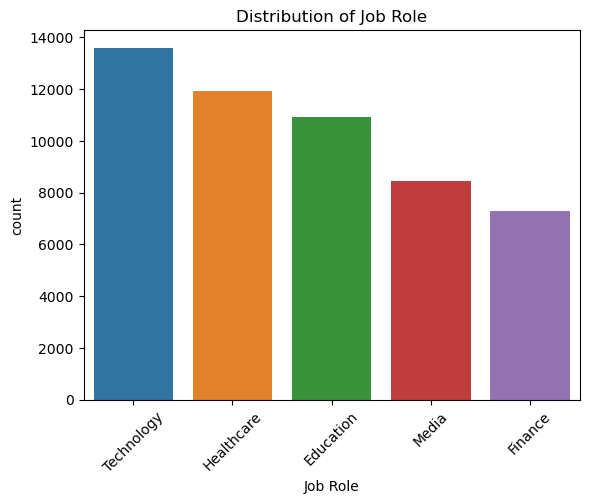

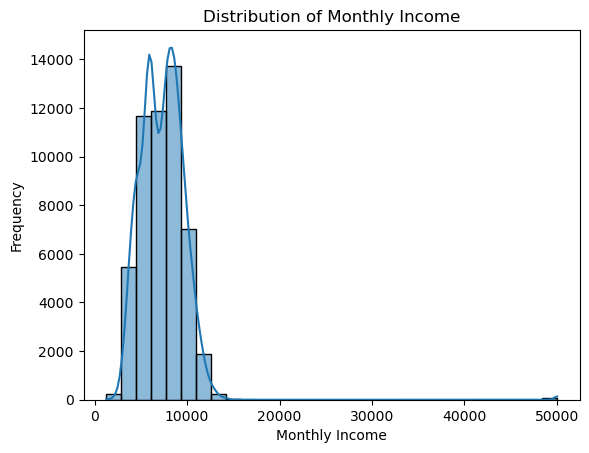

In [14]:
#Goal: Analyze the distribution of individual features.
# Categorical Example: Job Role
sns.countplot(x='Job Role', data=X_train, order=X_train['Job Role'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Job Role')
plt.show()

# Numerical Example: Monthly Income
sns.histplot(X_train['Monthly Income'], kde=True, bins=30)
plt.title('Distribution of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.show()


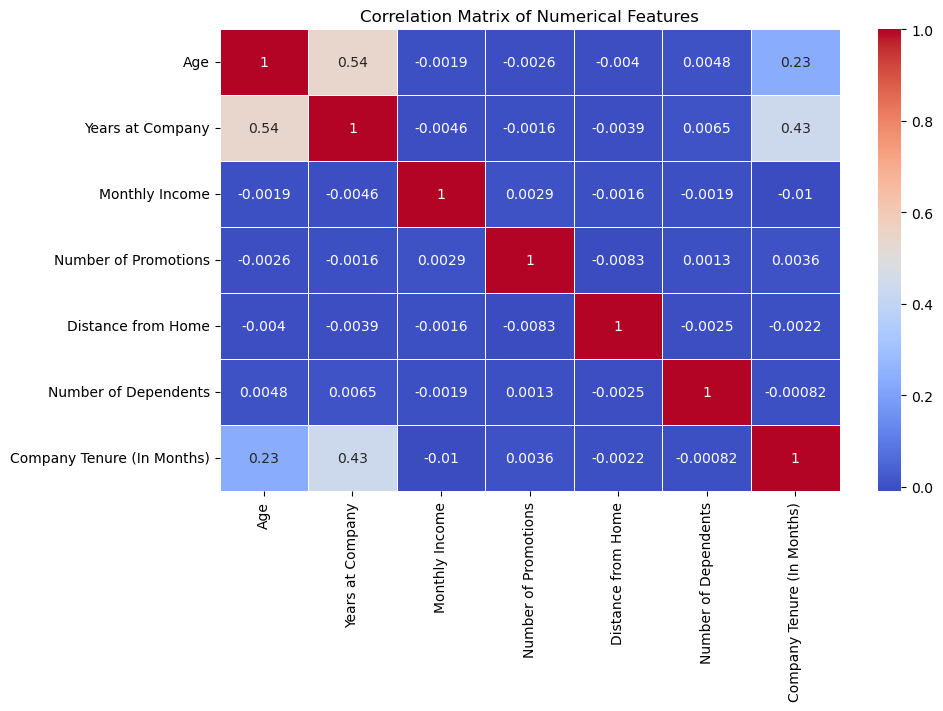

In [15]:
#Goal: Identify linear relationships among numeric variables.
# Correlation Matrix
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = X_train[numeric_cols].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


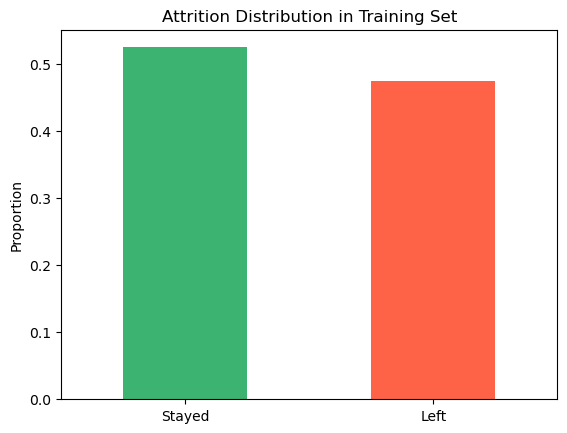

In [16]:
#Check if the attrition target is imbalanced.
# Visualizing class distribution in training set
y_train.value_counts(normalize=True).plot(kind='bar', color=['mediumseagreen', 'tomato'])
plt.title('Attrition Distribution in Training Set')
plt.xticks(ticks=[0,1], labels=['Stayed', 'Left'], rotation=0)
plt.ylabel('Proportion')
plt.show()


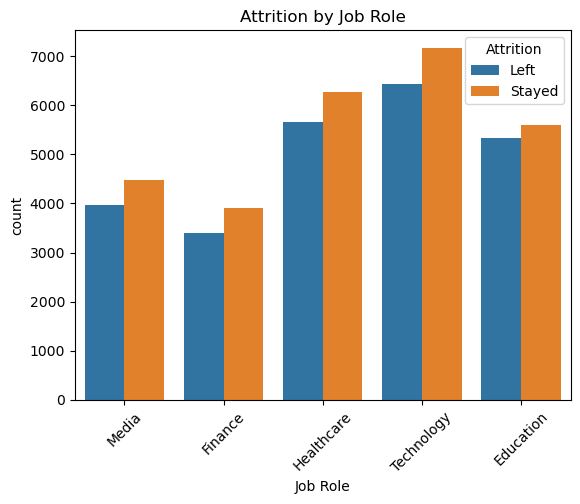

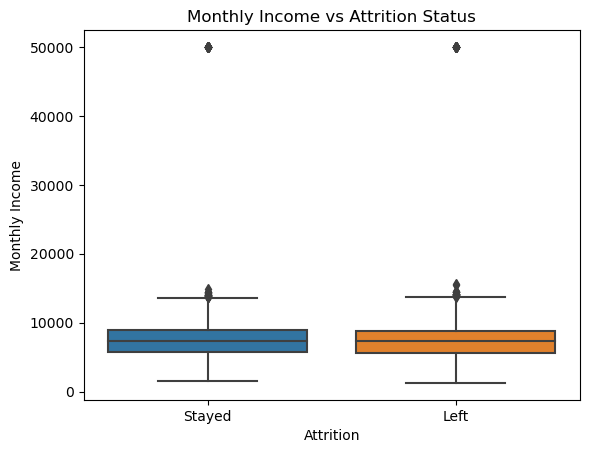

In [17]:
#Explore how features influence attrition.
# Categorical vs Target: Attrition by Job Role
sns.countplot(x='Job Role', hue=y_train.map({0: 'Stayed', 1: 'Left'}), data=X_train)
plt.xticks(rotation=45)
plt.title('Attrition by Job Role')
plt.show()

# Numerical vs Target: Income vs Attrition
sns.boxplot(x=y_train, y=X_train['Monthly Income'])
plt.xticks([0, 1], ['Stayed', 'Left'])
plt.title('Monthly Income vs Attrition Status')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.show()


# Feature Engineering

In [18]:
# Step 1: Identify categorical columns
cat_cols = X_train.select_dtypes(include='object').columns

# Step 2: Create dummy variables using one-hot encoding
X_train_encoded = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)
X_val_encoded = pd.get_dummies(X_val, columns=cat_cols, drop_first=True)

# Step 3: Align columns in both sets
X_train_encoded, X_val_encoded = X_train_encoded.align(X_val_encoded, join='left', axis=1, fill_value=0)


In [19]:
from sklearn.preprocessing import StandardScaler

# Step 1: Identify numerical columns to scale
num_cols = ['Age', 'Monthly Income', 'Distance from Home', 'Company Tenure (In Months)', 'Number of Promotions', 'Number of Dependents']

# Step 2: Initialize and fit scaler
scaler = StandardScaler()
X_train_encoded[num_cols] = scaler.fit_transform(X_train_encoded[num_cols])
X_val_encoded[num_cols] = scaler.transform(X_val_encoded[num_cols])


In [20]:
#print the shape of the scaling
print("X_train_encoded shape:", X_train_encoded.shape)
print("X_val_encoded shape:", X_val_encoded.shape)


X_train_encoded shape: (52227, 41)
X_val_encoded shape: (22383, 41)


In [21]:
#to check that scaling is worked or not
print("Monthly Income - mean:", X_train_encoded['Monthly Income'].mean())
print("Monthly Income - std deviation:", X_train_encoded['Monthly Income'].std())


Monthly Income - mean: -1.172741758525679e-16
Monthly Income - std deviation: 1.000009573729683


#  Model Building 

In [22]:
# Final features available
print("Number of features used:", X_train_encoded.shape[1])


Number of features used: 41


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Step 1: Instantiate model
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# Step 2: Fit model
model.fit(X_train_encoded, y_train)

# Step 3: Predict on validation set
y_pred = model.predict(X_val_encoded)

# Step 4: Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_val, model.predict_proba(X_val_encoded)[:,1]))


Confusion Matrix:
 [[8709 3048]
 [2541 8085]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.74      0.76     11757
           1       0.73      0.76      0.74     10626

    accuracy                           0.75     22383
   macro avg       0.75      0.75      0.75     22383
weighted avg       0.75      0.75      0.75     22383

ROC-AUC Score: 0.8422704505556164


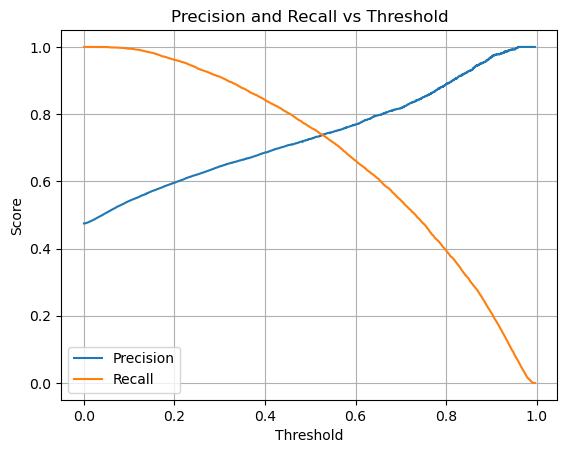

Optimal Threshold: 0.22637879896280366


In [24]:
from sklearn.metrics import precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Get predicted probabilities
y_scores = model.predict_proba(X_val_encoded)[:,1]

# Step 2: Calculate precision and recall for thresholds
precision, recall, thresholds = precision_recall_curve(y_val, y_scores)

# Step 3: Plot Precision-Recall vs Threshold
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend()
plt.grid()
plt.show()

# Step 4: Choose a threshold (e.g., one where precision ≈ recall)
optimal_idx = np.argmax(precision + recall)
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold:", optimal_threshold)


In [25]:
# Apply new threshold
y_pred_adjusted = (y_scores > optimal_threshold).astype(int)

# Reevaluate
print("Confusion Matrix (Adjusted):\n", confusion_matrix(y_val, y_pred_adjusted))
print("Classification Report (Adjusted):\n", classification_report(y_val, y_pred_adjusted))


Confusion Matrix (Adjusted):
 [[ 5285  6472]
 [  514 10112]]
Classification Report (Adjusted):
               precision    recall  f1-score   support

           0       0.91      0.45      0.60     11757
           1       0.61      0.95      0.74     10626

    accuracy                           0.69     22383
   macro avg       0.76      0.70      0.67     22383
weighted avg       0.77      0.69      0.67     22383



# Prediction and Model Evaluation

In [26]:
# Predict class labels on validation set using optimal threshold
y_pred_proba = model.predict_proba(X_val_encoded)[:, 1]

# (Optional) Use adjusted threshold if determined
threshold = optimal_threshold  # use your earlier calculated threshold
y_pred = (y_pred_proba > threshold).astype(int)


In [27]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_val, y_pred)
print("Model Accuracy:", round(accuracy, 4))


Model Accuracy: 0.6879


In [28]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:\n", cm)

# Assign values
TN, FP, FN, TP = cm.ravel()

print(f"True Positive (TP): {TP}")
print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")


Confusion Matrix:
 [[ 5285  6472]
 [  514 10112]]
True Positive (TP): 10112
True Negative (TN): 5285
False Positive (FP): 6472
False Negative (FN): 514


In [29]:
# Sensitivity (Recall for class 1)
sensitivity = TP / (TP + FN)

# Specificity (Recall for class 0)
specificity = TN / (TN + FP)

print("Sensitivity (Recall for 'Left'):", round(sensitivity, 4))
print("Specificity (Recall for 'Stayed'):", round(specificity, 4))


Sensitivity (Recall for 'Left'): 0.9516
Specificity (Recall for 'Stayed'): 0.4495


In [30]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

print("Precision (for 'Left'):", round(precision, 4))
print("Recall (for 'Left'):", round(recall, 4))


Precision (for 'Left'): 0.6097
Recall (for 'Left'): 0.9516
